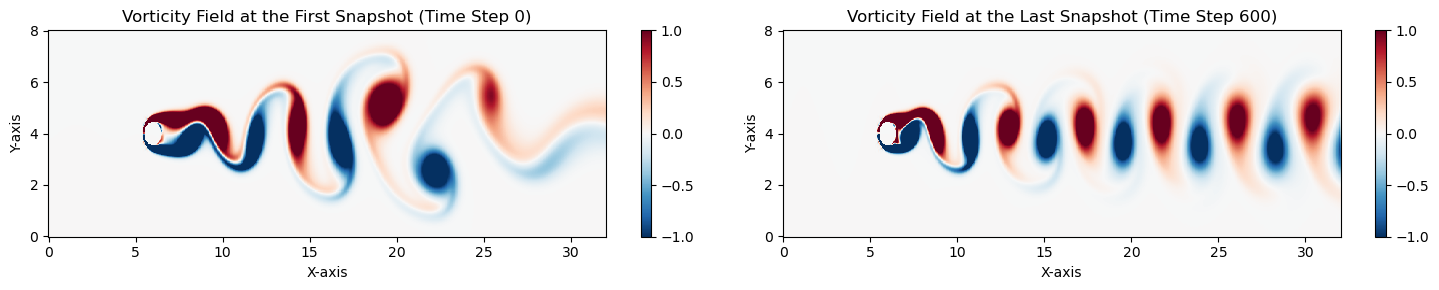

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# An example code that reads the cylinder flow data
#
# file name of the CSV format data

data_file = "data/cyldata6h.csv"

# load the data
u = np.loadtxt(data_file,delimiter=",")

# Each column of U is a time snapshot of the vorticity of a 2D flow
# The grid of the flow consists of 768 points along the x-direction
# and 192 points along the y-direction
# the domain is [0, 32] x [0 8]

nx = 768
ny = 192
x = np.linspace(0,32,nx)
y = np.linspace(0,8,ny)

# let us visualize two snapshots of the vorticity field

plt.figure(figsize=(15,3))
# Plotting the first subplot
plt.subplot(1, 2, 1)
plt.pcolormesh(x, y, np.reshape(u[:, 0], (ny, nx)), cmap="RdBu_r", vmin=-1, vmax=1)
plt.title('Vorticity Field at the First Snapshot (Time Step 0)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.colorbar()  # Add a colorbar for reference

# Plotting the second subplot
plt.subplot(1, 2, 2)
plt.pcolormesh(x, y, np.reshape(u[:, 600], (ny, nx)), cmap="RdBu_r", vmin=-1, vmax=1)
plt.title('Vorticity Field at the Last Snapshot (Time Step 600)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.colorbar()  # Add a colorbar for reference

# Adjust layout to prevent overlap of titles and labels
plt.tight_layout()

# Show the plot

plt.show()


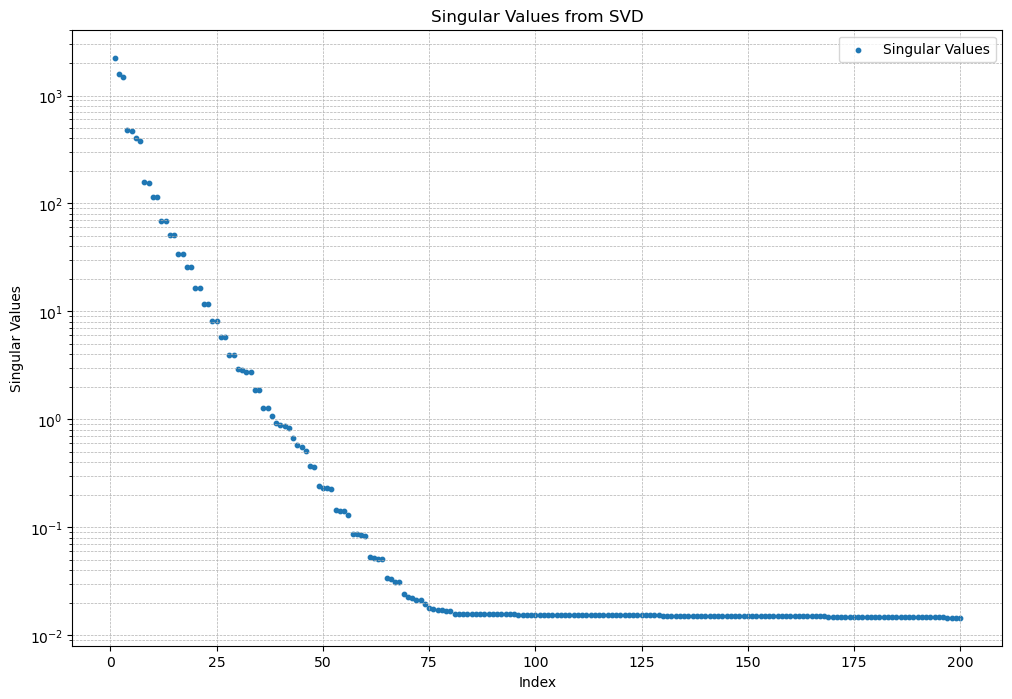

In [2]:
# Extract 200 snapshorts from time step 400 to 600 as our primary study data
U = u[:, 400:601]
# Regression U2 = A*U1
U1 = U[:,:-1]
U2 = U[:,1:]
# POD
Phi,Sig,PsiT = np.linalg.svd(U1,full_matrices=0)

# Sig is the array of singular values
plt.figure(figsize=(12, 8))
plt.scatter(np.arange(1, len(Sig) + 1), Sig, marker='o', s=10, label='Singular Values')
plt.yscale('log')  # Use a logarithmic scale for the y-axis

plt.xlabel('Index')
plt.ylabel('Singular Values')
plt.title('Singular Values from SVD')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


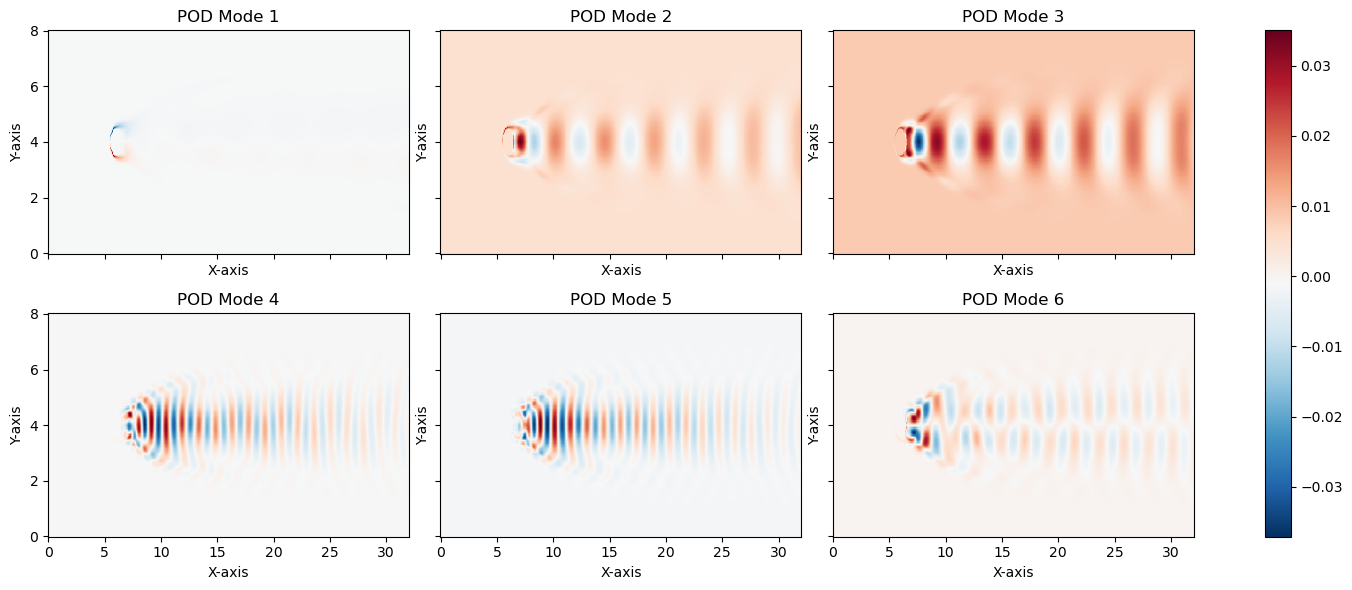

In [3]:

# Number of POD modes to plot
num_modes = 6

# Create a 2x3 grid of subplots for the first 6 modes
fig, axes = plt.subplots(2, 3, figsize=(15, 6), sharex=True, sharey=True)

# Flatten the axes array for easier indexing
axes = axes.flatten()

for k in range(num_modes):
    ax = axes[k]
    # Plot the k-th POD mode
    im = ax.pcolormesh(x, y, np.reshape(Phi[:, k], (ny, nx)), cmap="RdBu_r")
    ax.set_title(f'POD Mode {k + 1}')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')

plt.tight_layout()

# Add a colorbar that is common to all subplots
cbar = fig.colorbar(im, ax=axes, orientation='vertical')
plt.show()

In [4]:
# choose 7-rank approximation
r = 7
rPhi = Phi[:,:r]
rSig = Sig[:r]
rPsiT = PsiT[:r,:]

# projected data of 7 rank approximation matrix 
rU = np.dot(rPhi*rSig, rPsiT)
# Pearson's correlation coefficient
print(np.corrcoef(U[:,100],rU[:, 100]))

[[1.        0.9950573]
 [0.9950573 1.       ]]


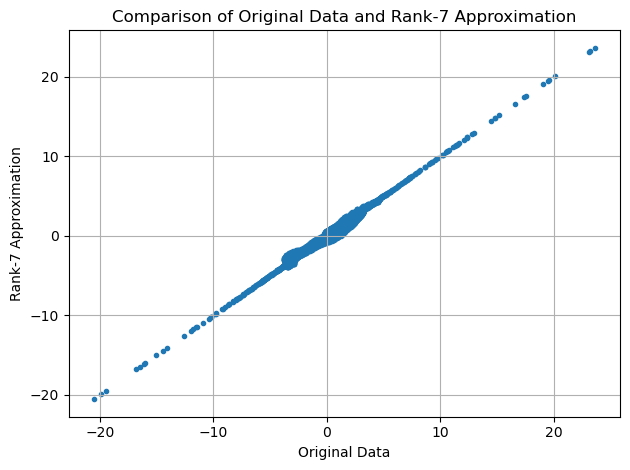

In [5]:
# Create a scatter plot compare orignal data and rank-7 approximation
plt.scatter(U[:, 100], rU[:, 100], marker='.')

plt.xlabel('Original Data')
plt.ylabel('Rank-7 Approximation')
plt.title('Comparison of Original Data and Rank-7 Approximation')

plt.grid(True)
plt.tight_layout()
plt.show()

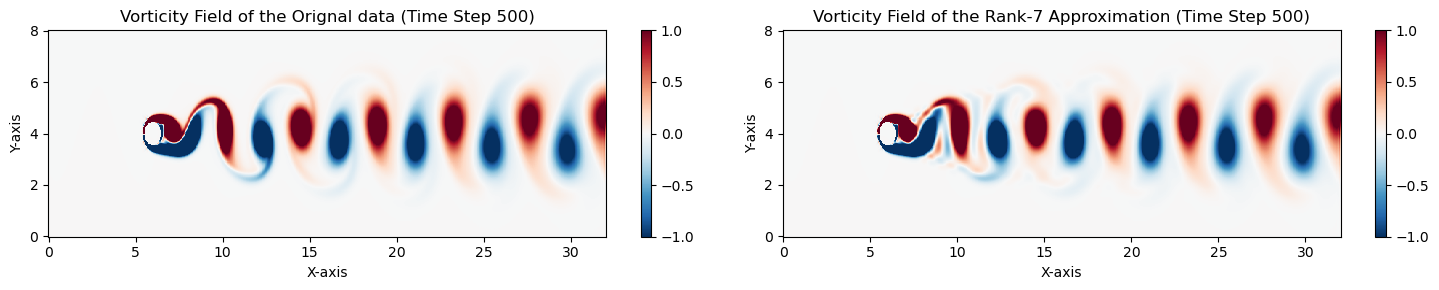

In [6]:
plt.figure(figsize=(15,3))
# Plotting the first subplot for original data
plt.subplot(1, 2, 1)
plt.pcolormesh(x, y, np.reshape(U[:, 100], (ny, nx)), cmap="RdBu_r", vmin=-1, vmax=1)
plt.title('Vorticity Field of the Orignal data (Time Step 500)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.colorbar()

# Plotting the second subplot for pod approximation
plt.subplot(1, 2, 2)
plt.pcolormesh(x, y, np.reshape(rU[:, 100], (ny, nx)), cmap="RdBu_r", vmin=-1, vmax=1)
plt.title('Vorticity Field of the Rank-7 Approximation (Time Step 500)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.colorbar()

plt.tight_layout()
plt.show()


In [7]:
# DMD mode
# regression equation U2 = A*U1

A = np.linalg.multi_dot([rPhi.T, U2, rPsiT.T/rSig])  # Atilde

Omega, R = np.linalg.eig(A)

# computing DMD mode matrix
pD = np.dot(rPhi,R)
idx = Omega.argsort()[::-1]

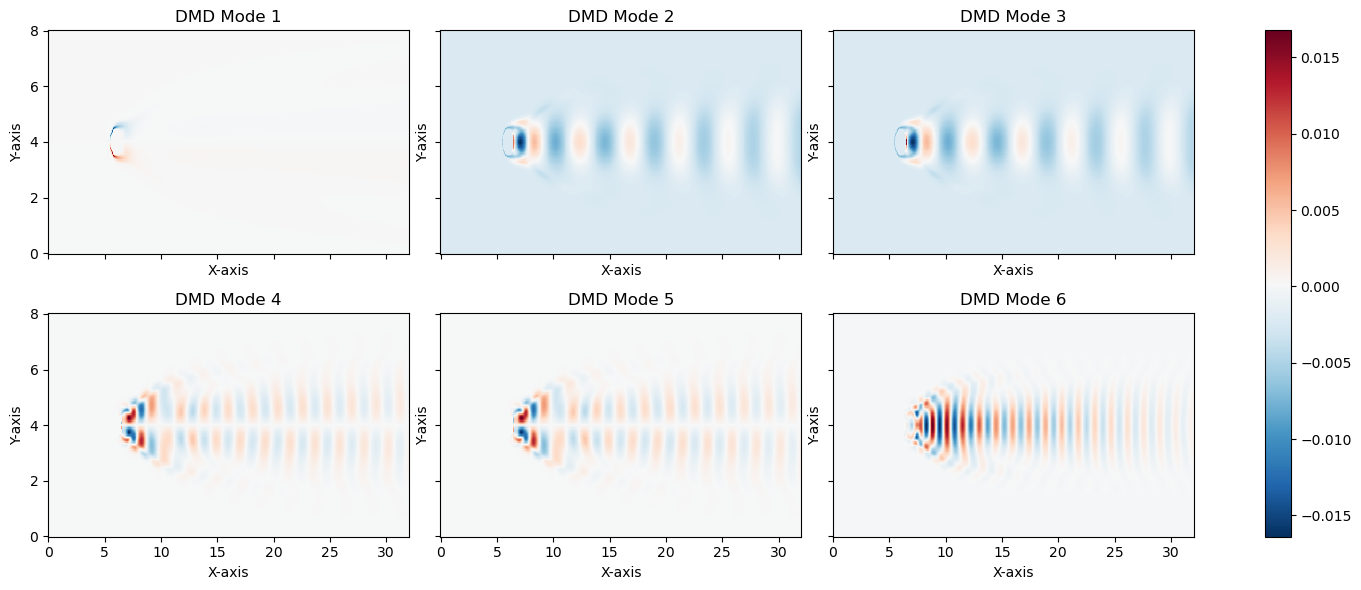

In [8]:
# Number of DMD modes to plot
num_modes = 6

# Create a 2x3 grid of subplots for the first 6 modes
fig, axes = plt.subplots(2, 3, figsize=(15, 6), sharex=True, sharey=True)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the strongest 6 modes
for k in range(num_modes):
    ax = axes[k]
    # Plot the k-th DOD mode
    im = ax.pcolormesh(x, y, np.reshape(pD[:,idx[k]].real, (ny, nx)), cmap="RdBu_r")
    ax.set_title(f'DMD Mode {k + 1}')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')

plt.tight_layout()

# Add a colorbar that is common to all subplots
cbar = fig.colorbar(im, ax=axes, orientation='vertical')
plt.show()


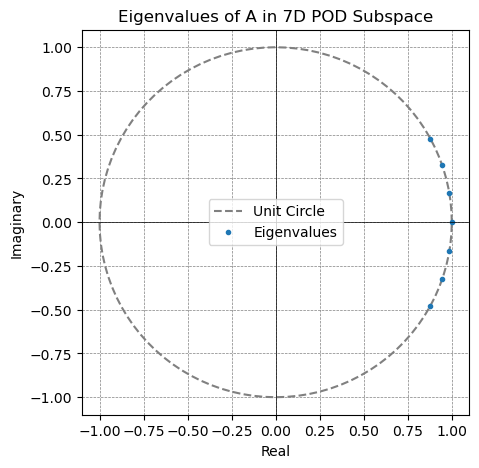

In [9]:
# plot 7 DMD eigenvalues on complex plan
plt.figure(figsize=(5,5))
theta = np.linspace(0, 2*np.pi, 101)

# Plotting the unit circle
plt.plot(np.cos(theta), np.sin(theta), label='Unit Circle', linestyle='--', color='gray')

# Plotting the eigenvalues
plt.plot(Omega.real, Omega.imag, '.', label='Eigenvalues')

plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Eigenvalues of A in 7D POD Subspace')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

In [10]:
# 7-dimensional DMD reconstruction
u0 = U[:,0]
b = np.linalg.lstsq(pD,u0,rcond=None)[0] # pD*b = u0

dt = 0.125
w = np.log(Omega)/dt

m = 100
t = m*dt
V = np.dot(pD, b*np.exp(w*t)).real
np.corrcoef(V,U[:,m])

array([[1.        , 0.99502526],
       [0.99502526, 1.        ]])

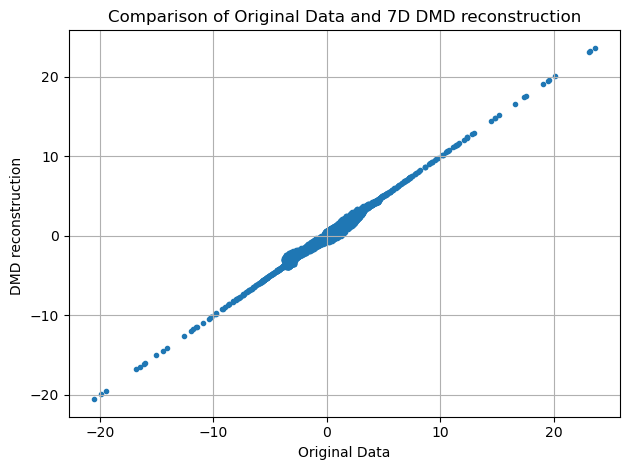

In [11]:
# Create a scatter plot compare origianl data and DMD reconstruction
plt.scatter(U[:, 100], V, marker='.')

# Add labels and title
plt.xlabel('Original Data')
plt.ylabel('DMD reconstruction ')
plt.title('Comparison of Original Data and 7D DMD reconstruction')

plt.grid(True)
plt.tight_layout()
plt.show()

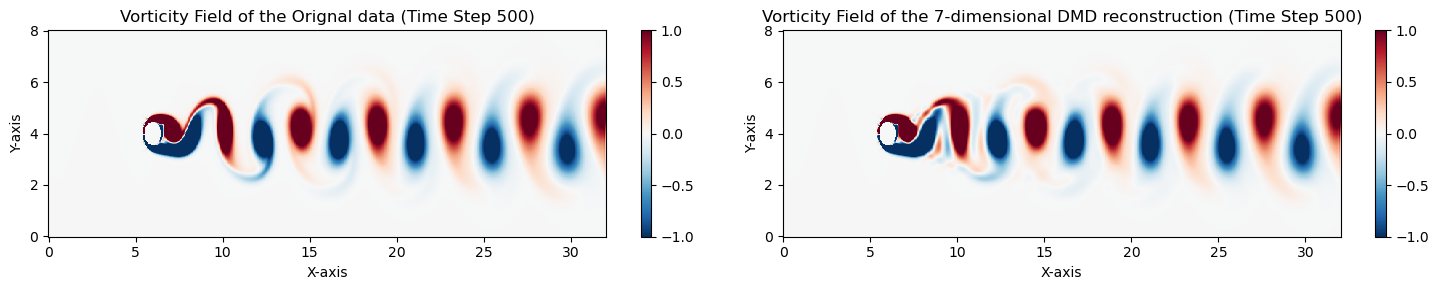

In [12]:
plt.figure(figsize=(15,3))
# Plotting the first subplot for origianl data
plt.subplot(1, 2, 1)
plt.pcolormesh(x, y, np.reshape(U[:, m], (ny, nx)), cmap="RdBu_r", vmin=-1, vmax=1)
plt.title(f'Vorticity Field of the Orignal data (Time Step {400+m})')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.colorbar()

# Plotting the second subplot for DMD reconstruction
plt.subplot(1, 2, 2)
plt.pcolormesh(x, y, np.reshape(V, (ny, nx)), cmap="RdBu_r", vmin=-1, vmax=1)
plt.title(f'Vorticity Field of the {r}-dimensional DMD reconstruction (Time Step {400+m})')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.colorbar() 

plt.tight_layout()
plt.show()

#### Test 25 demsional reconstruction, choose rank-25 POD approximation and the strongest 25 egienvectors and egienvalues for DMD reconstruction

array([[1.        , 0.99999374],
       [0.99999374, 1.        ]])

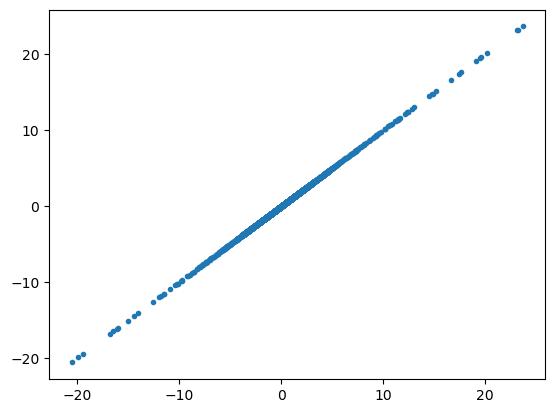

In [13]:
r = 25
rPhi = Phi[:,:r]
rSig = Sig[:r]
rPsiT = PsiT[:r,:]

# projected data

rU = np.dot(rPhi*rSig, rPsiT)

plt.plot(U[:,100],rU[:, 100],'.')
np.corrcoef(U[:,100],rU[:,100])

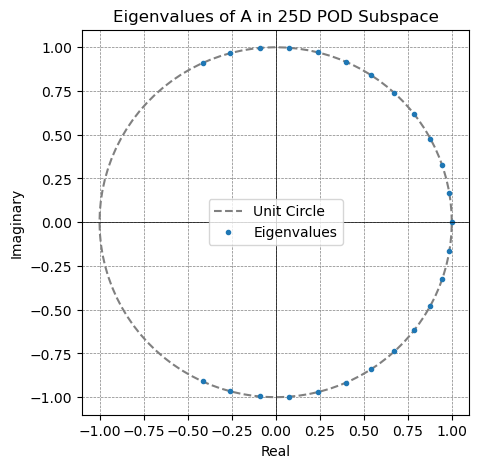

In [14]:
# DMD mode
# regression equation U2 = A*U1

A = np.linalg.multi_dot([rPhi.T, U2, rPsiT.T/rSig])  #Atilde

Omega, R = np.linalg.eig(A)
pD = np.dot(rPhi,R)

plt.figure(figsize=(5,5))
theta = np.linspace(0, 2*np.pi, 101)

# Plotting the unit circle
plt.plot(np.cos(theta), np.sin(theta), label='Unit Circle', linestyle='--', color='gray')

# Plotting the eigenvalues
plt.plot(Omega.real, Omega.imag, '.', label='Eigenvalues')

plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Eigenvalues of A in 25D POD Subspace')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()


In [15]:
# DMD reconstruction
u0 = U[:,0]
b = np.linalg.lstsq(pD,u0,rcond=None)[0] # pD*b = u0

dt = 0.125
w = np.log(Omega)/dt

m = 100
t = m*dt
V = np.dot(pD, b*np.exp(w*t)).real
np.corrcoef(V,U[:,m])

array([[1.       , 0.9999917],
       [0.9999917, 1.       ]])

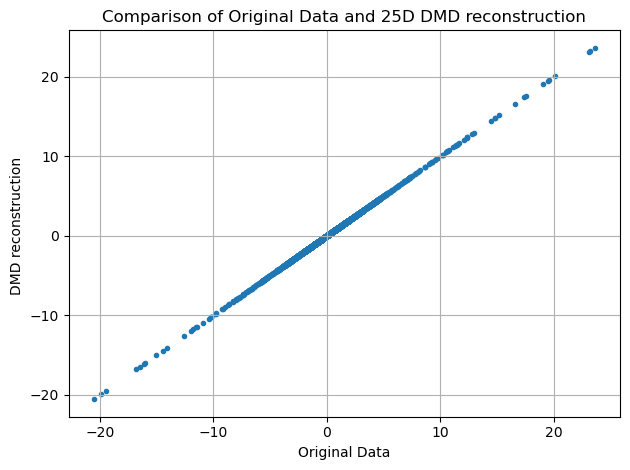

In [16]:
# Create a scatter plot
plt.scatter(U[:, 100], V, marker='.')

plt.xlabel('Original Data')
plt.ylabel('DMD reconstruction ')
plt.title('Comparison of Original Data and 25D DMD reconstruction')
plt.grid(True)
plt.tight_layout()

plt.show()

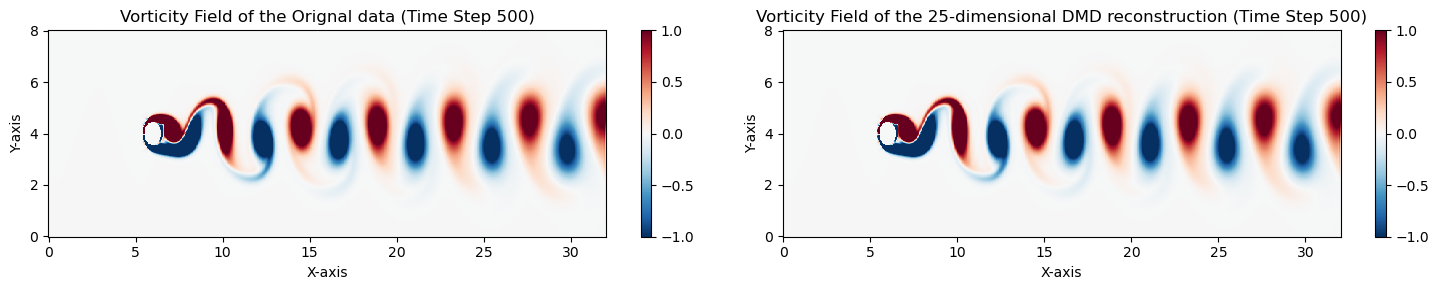

In [17]:
plt.figure(figsize=(15,3))
# Plotting the first subplot for origianl data
plt.subplot(1, 2, 1)
plt.pcolormesh(x, y, np.reshape(U[:, m], (ny, nx)), cmap="RdBu_r", vmin=-1, vmax=1)
plt.title(f'Vorticity Field of the Orignal data (Time Step {400+m})')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.colorbar()

# Plotting the second subplot for 25-dimensioal DMD reconstruction
plt.subplot(1, 2, 2)
plt.pcolormesh(x, y, np.reshape(V, (ny, nx)), cmap="RdBu_r", vmin=-1, vmax=1)
plt.title(f'Vorticity Field of the {r}-dimensional DMD reconstruction (Time Step {400+m})')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.colorbar() 

plt.tight_layout()
plt.show()
